# Data API Recipe

# Step2 Quantitative Analysis

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from typing import Dict, List, Union, Optional, Any

import warnings
warnings.filterwarnings("ignore")

def plot_regressions(X, y, plots_in_col = 3, lowess=False):

    labels = list(X.columns)
    
    N, p = X.shape

    rows = int(np.ceil(p/plots_in_col)) 

    fig, axes = plt.subplots(rows, plots_in_col, figsize=(12, rows*(12/4)))

    for i, ax in enumerate(fig.axes):
        if i < p:
            sns.regplot(X.iloc[:,i], y,  ci=None, y_jitter=0.05, 
                        scatter_kws={'s': 25, 'alpha':.8}, ax=ax, lowess=lowess,
                        line_kws={"color": "#c02c38"})
            ax.set_xlabel('')
            ax.set_ylabel('')
            ax.set_title(labels[i])
        else:
            fig.delaxes(ax)

    sns.despine()
    plt.tight_layout()
    plt.show()
    
    return fig, axes
    
def plot_multiTS(data: pd.DataFrame, cols_idx: List, date_col: str):
    
    sns.set_theme(style="darkgrid")

    # cols_idx = [0, 1,3,4]
    features = (len(cols_idx),1)
    date = date_col
    fig, axes = plt.subplots(features[0], features[1], figsize=(features[0]*4,10))

    # data.date = pd.to_datetime(data.date)
    for i in range(features[0]):
        sns.lineplot(x = date,y = data.columns[cols_idx[i]], data = data,ax = axes[i,])
        
    return fig

In [25]:
data = pd.read_csv('../Data/btc_tg.csv', parse_dates=['DATE'])

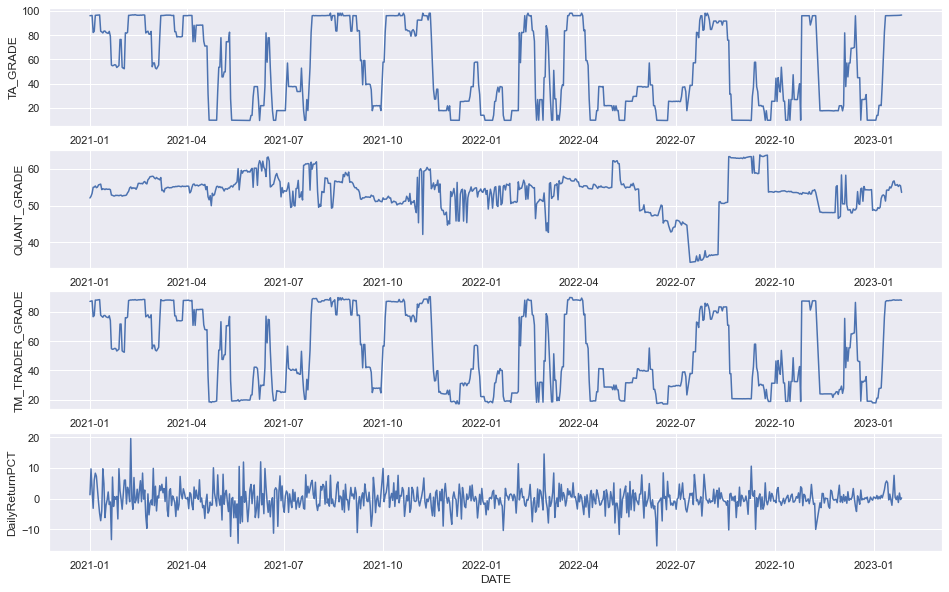

In [26]:
fig = plot_multiTS(data[['TA_GRADE','QUANT_GRADE','TM_TRADER_GRADE','DailyReturnPCT','DATE']], list(range(4)), 'DATE')
fig.savefig('../Plots/btc_tg.png')

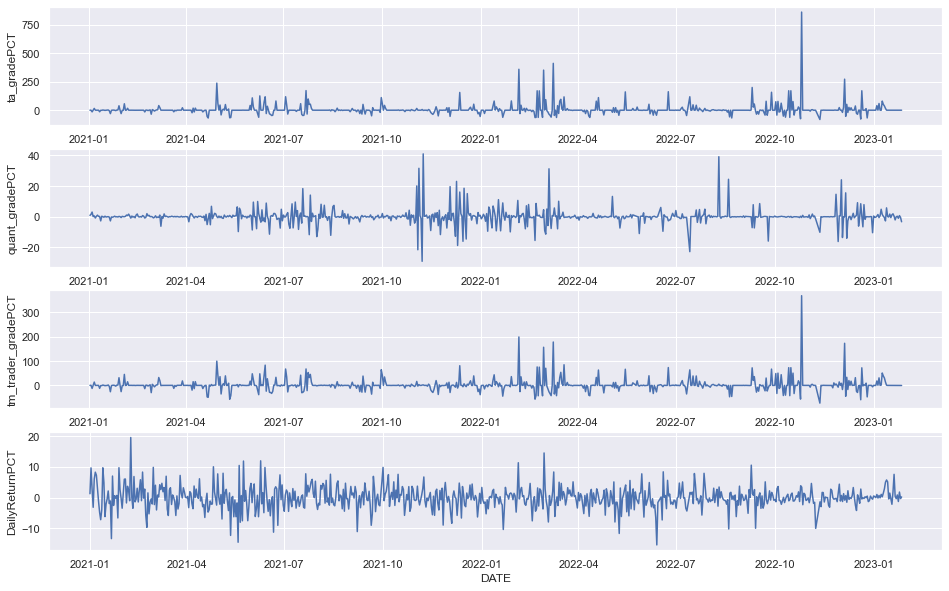

In [27]:
fig = plot_multiTS(data[['ta_gradePCT','quant_gradePCT','tm_trader_gradePCT','DailyReturnPCT','DATE']], list(range(4)), 'DATE')
fig.savefig('../Plots/btc_tg_pct.png')

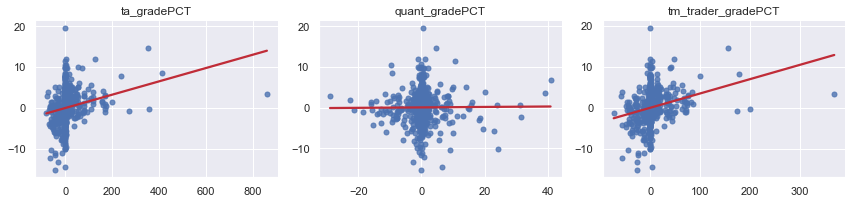

In [28]:
fig,axes = plot_regressions(data[['ta_gradePCT','quant_gradePCT','tm_trader_gradePCT']], data['DailyReturnPCT'], plots_in_col = 3)
fig.savefig('../Plots/btc_tg_pct_regressions_DayReturnPCT.png')

In [29]:
# handle missing values
data = data.fillna(method='ffill')
data[['DATE','Open','High','Low','Close','Volume','TA_GRADE','QUANT_GRADE','TM_TRADER_GRADE']].sort_values(by = 'DATE').to_csv('../Data/TMdata.csv', index=False)